In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import data_cleaning_visualization as cv
cleaner=cv.DataCleaningAndVisualization()

In [54]:
df=pd.read_csv('CarPrice_Assignment.csv')

In [55]:
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [56]:
cleaner.data_info(df)

,Col,dtype,n_uniques,n_nan,unique_val,duplicated
0,car_ID,int64,205,0,"[1, 142, 132, 133, 134, 135, 136, 137, 138, 139]",0
1,symboling,int64,6,0,"[0, 1, 2, 3, -1, -2]",0
2,CarName,object,147,0,"[toyota corona, toyota corolla, peugeot 504, s...",0
3,fueltype,object,2,0,"[gas, diesel]",0
4,aspiration,object,2,0,"[std, turbo]",0
5,doornumber,object,2,0,"[four, two]",0
6,carbody,object,5,0,"[sedan, hatchback, wagon, hardtop, convertible]",0
7,drivewheel,object,3,0,"[fwd, rwd, 4wd]",0
8,enginelocation,object,2,0,"[front, rear]",0
9,wheelbase,float64,53,0,"[94.5, 93.7, 95.7, 96.5, 97.3, 98.4, 104.3, 10...",0


**No nulls found**, ['Cartype','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'] are objects so encoding is needed, 205 carId so total number of rows is 205.



In [57]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


Column 'car_ID' is not categorical.
Column 'CarName' is not categorical.
Column 'wheelbase' is not categorical.
Column 'carlength' is not categorical.
Column 'carwidth' is not categorical.
Column 'carheight' is not categorical.
Column 'curbweight' is not categorical.
Column 'enginesize' is not categorical.
Column 'boreratio' is not categorical.
Column 'stroke' is not categorical.
Column 'compressionratio' is not categorical.
Column 'horsepower' is not categorical.
Column 'peakrpm' is not categorical.
Column 'citympg' is not categorical.
Column 'highwaympg' is not categorical.
Column 'price' is not categorical.


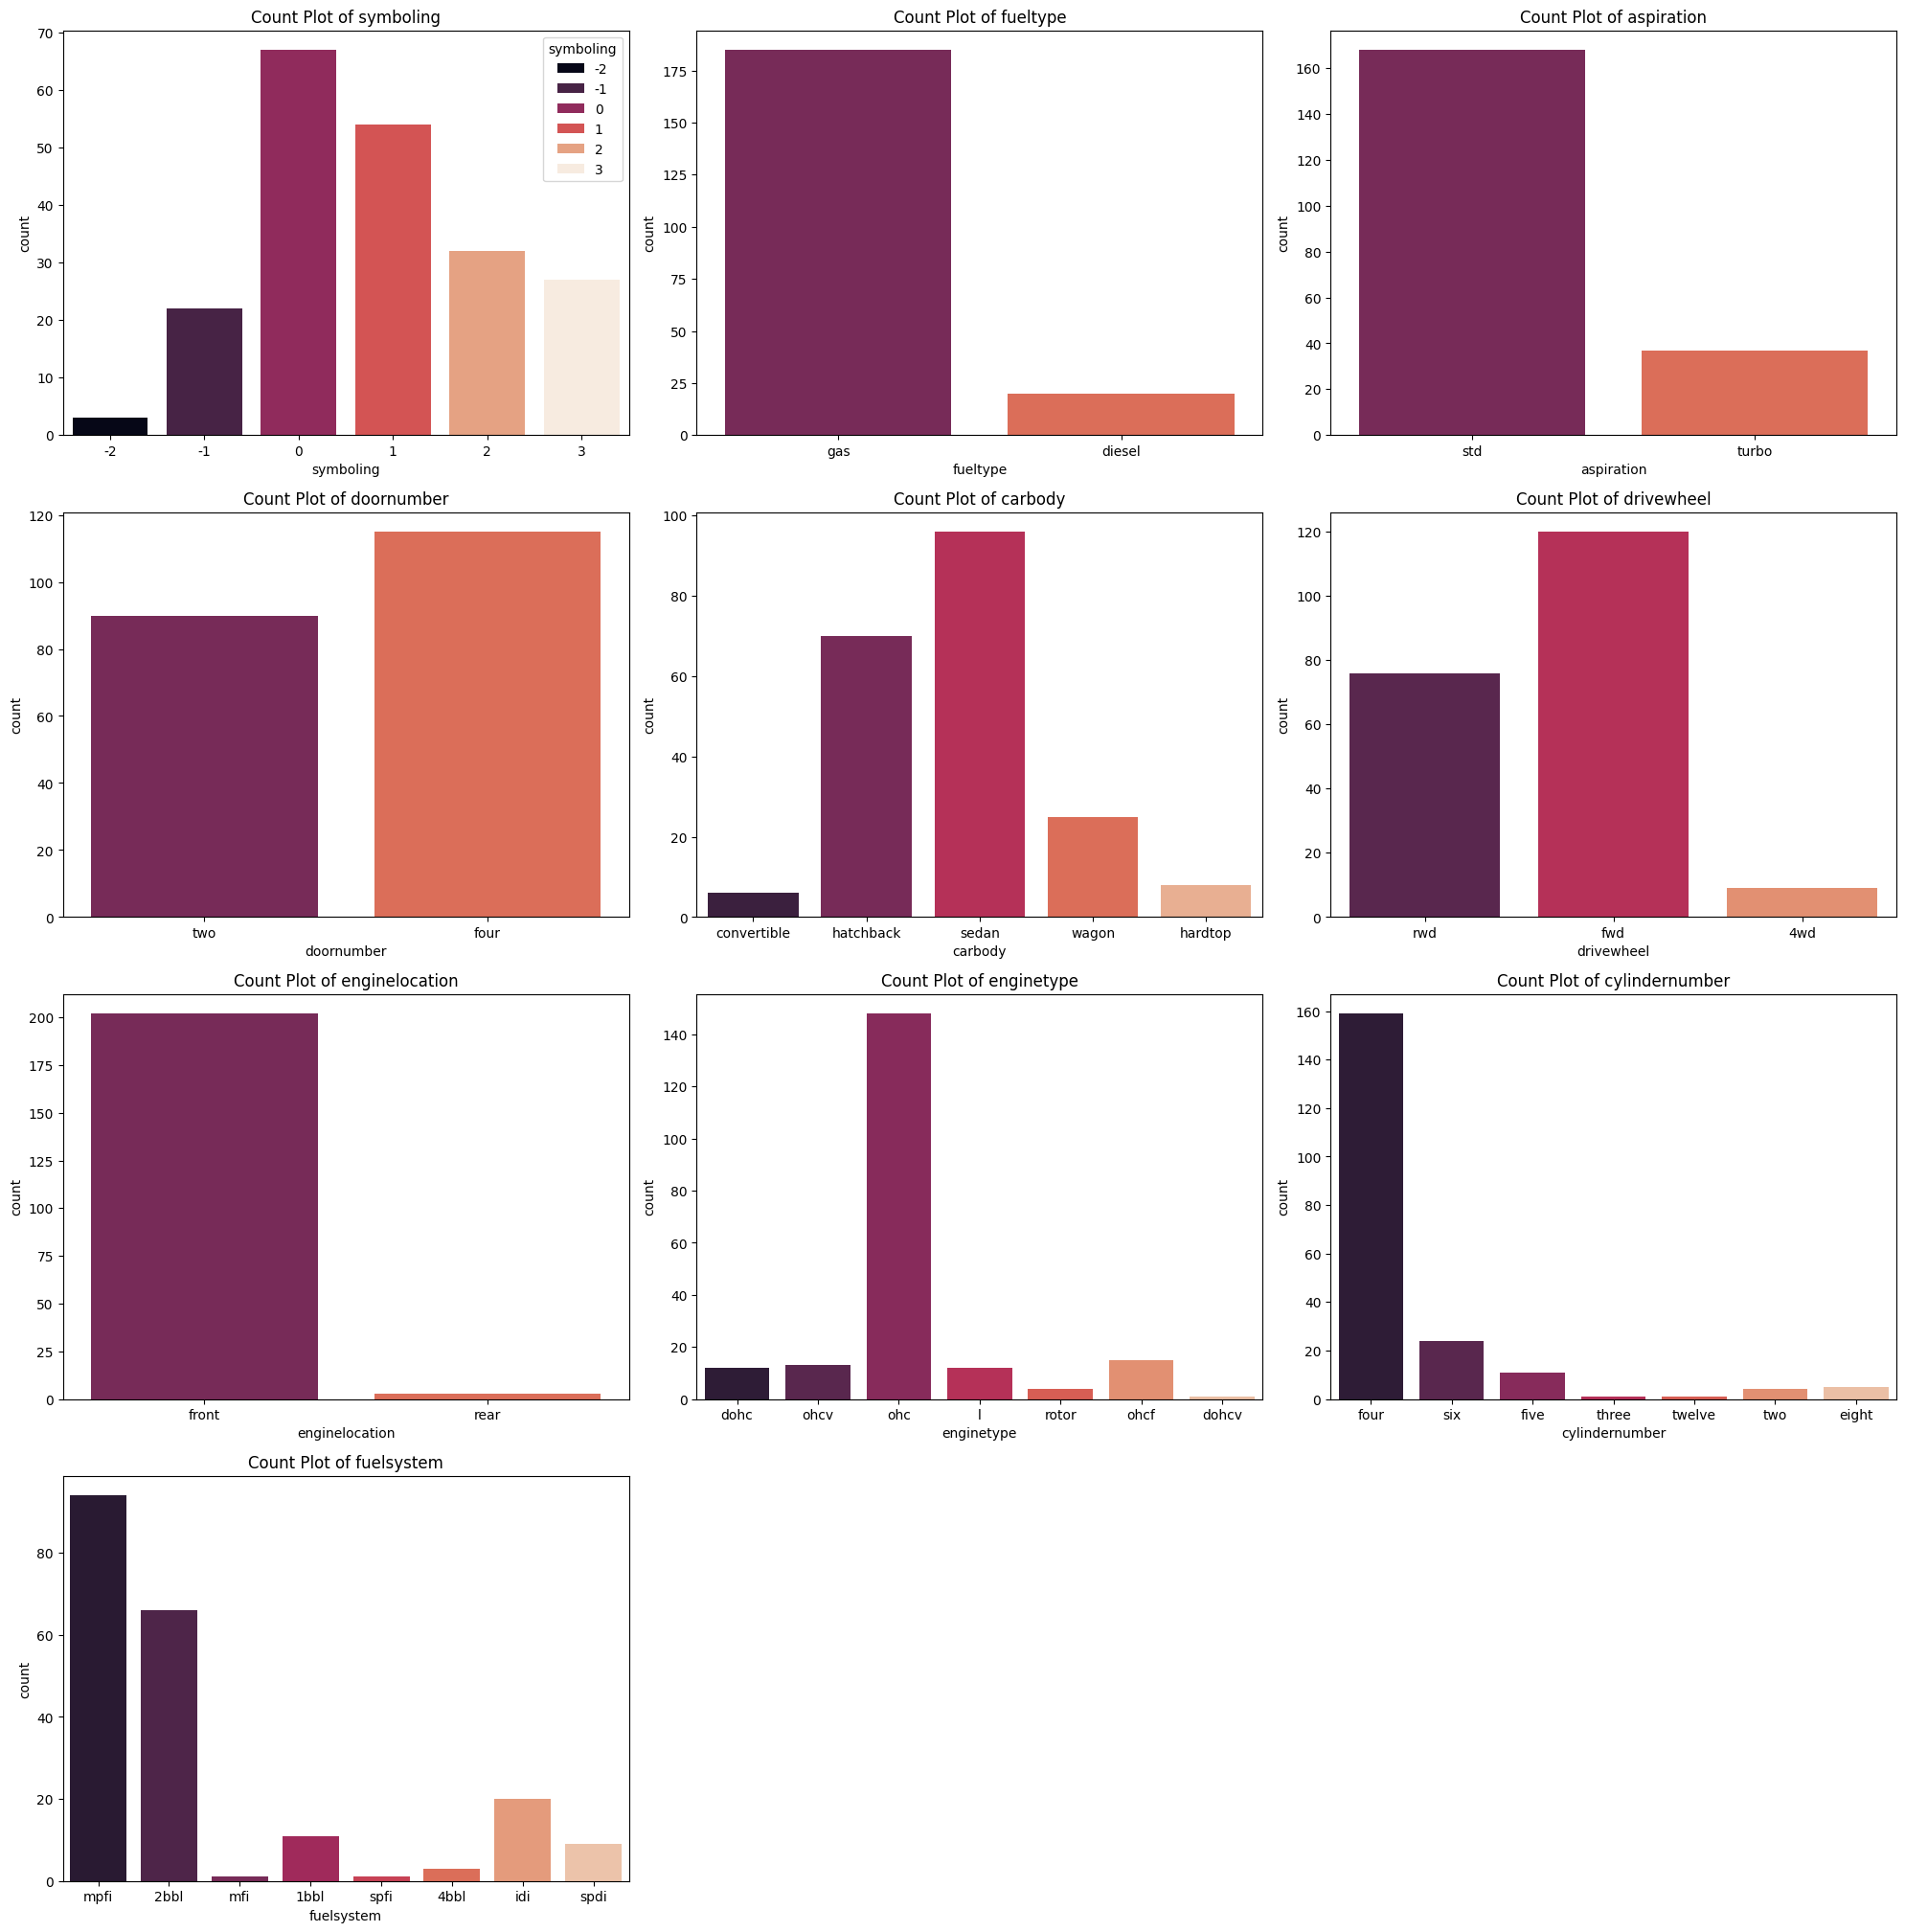

In [58]:
cleaner.categorical_plot(df,df.columns,8)

carName is removed from categorical features by putting number of cat_value = 8; carName has a high value of nuniques.

Column 'car_ID' is not countinuous.
Column 'symboling' is not countinuous.
Column 'CarName' is not countinuous.
Column 'fueltype' is not countinuous.
Column 'aspiration' is not countinuous.
Column 'doornumber' is not countinuous.
Column 'carbody' is not countinuous.
Column 'drivewheel' is not countinuous.
Column 'enginelocation' is not countinuous.
Column 'curbweight' is not countinuous.
Column 'enginetype' is not countinuous.
Column 'cylindernumber' is not countinuous.
Column 'fuelsystem' is not countinuous.
Column 'price' is not countinuous.


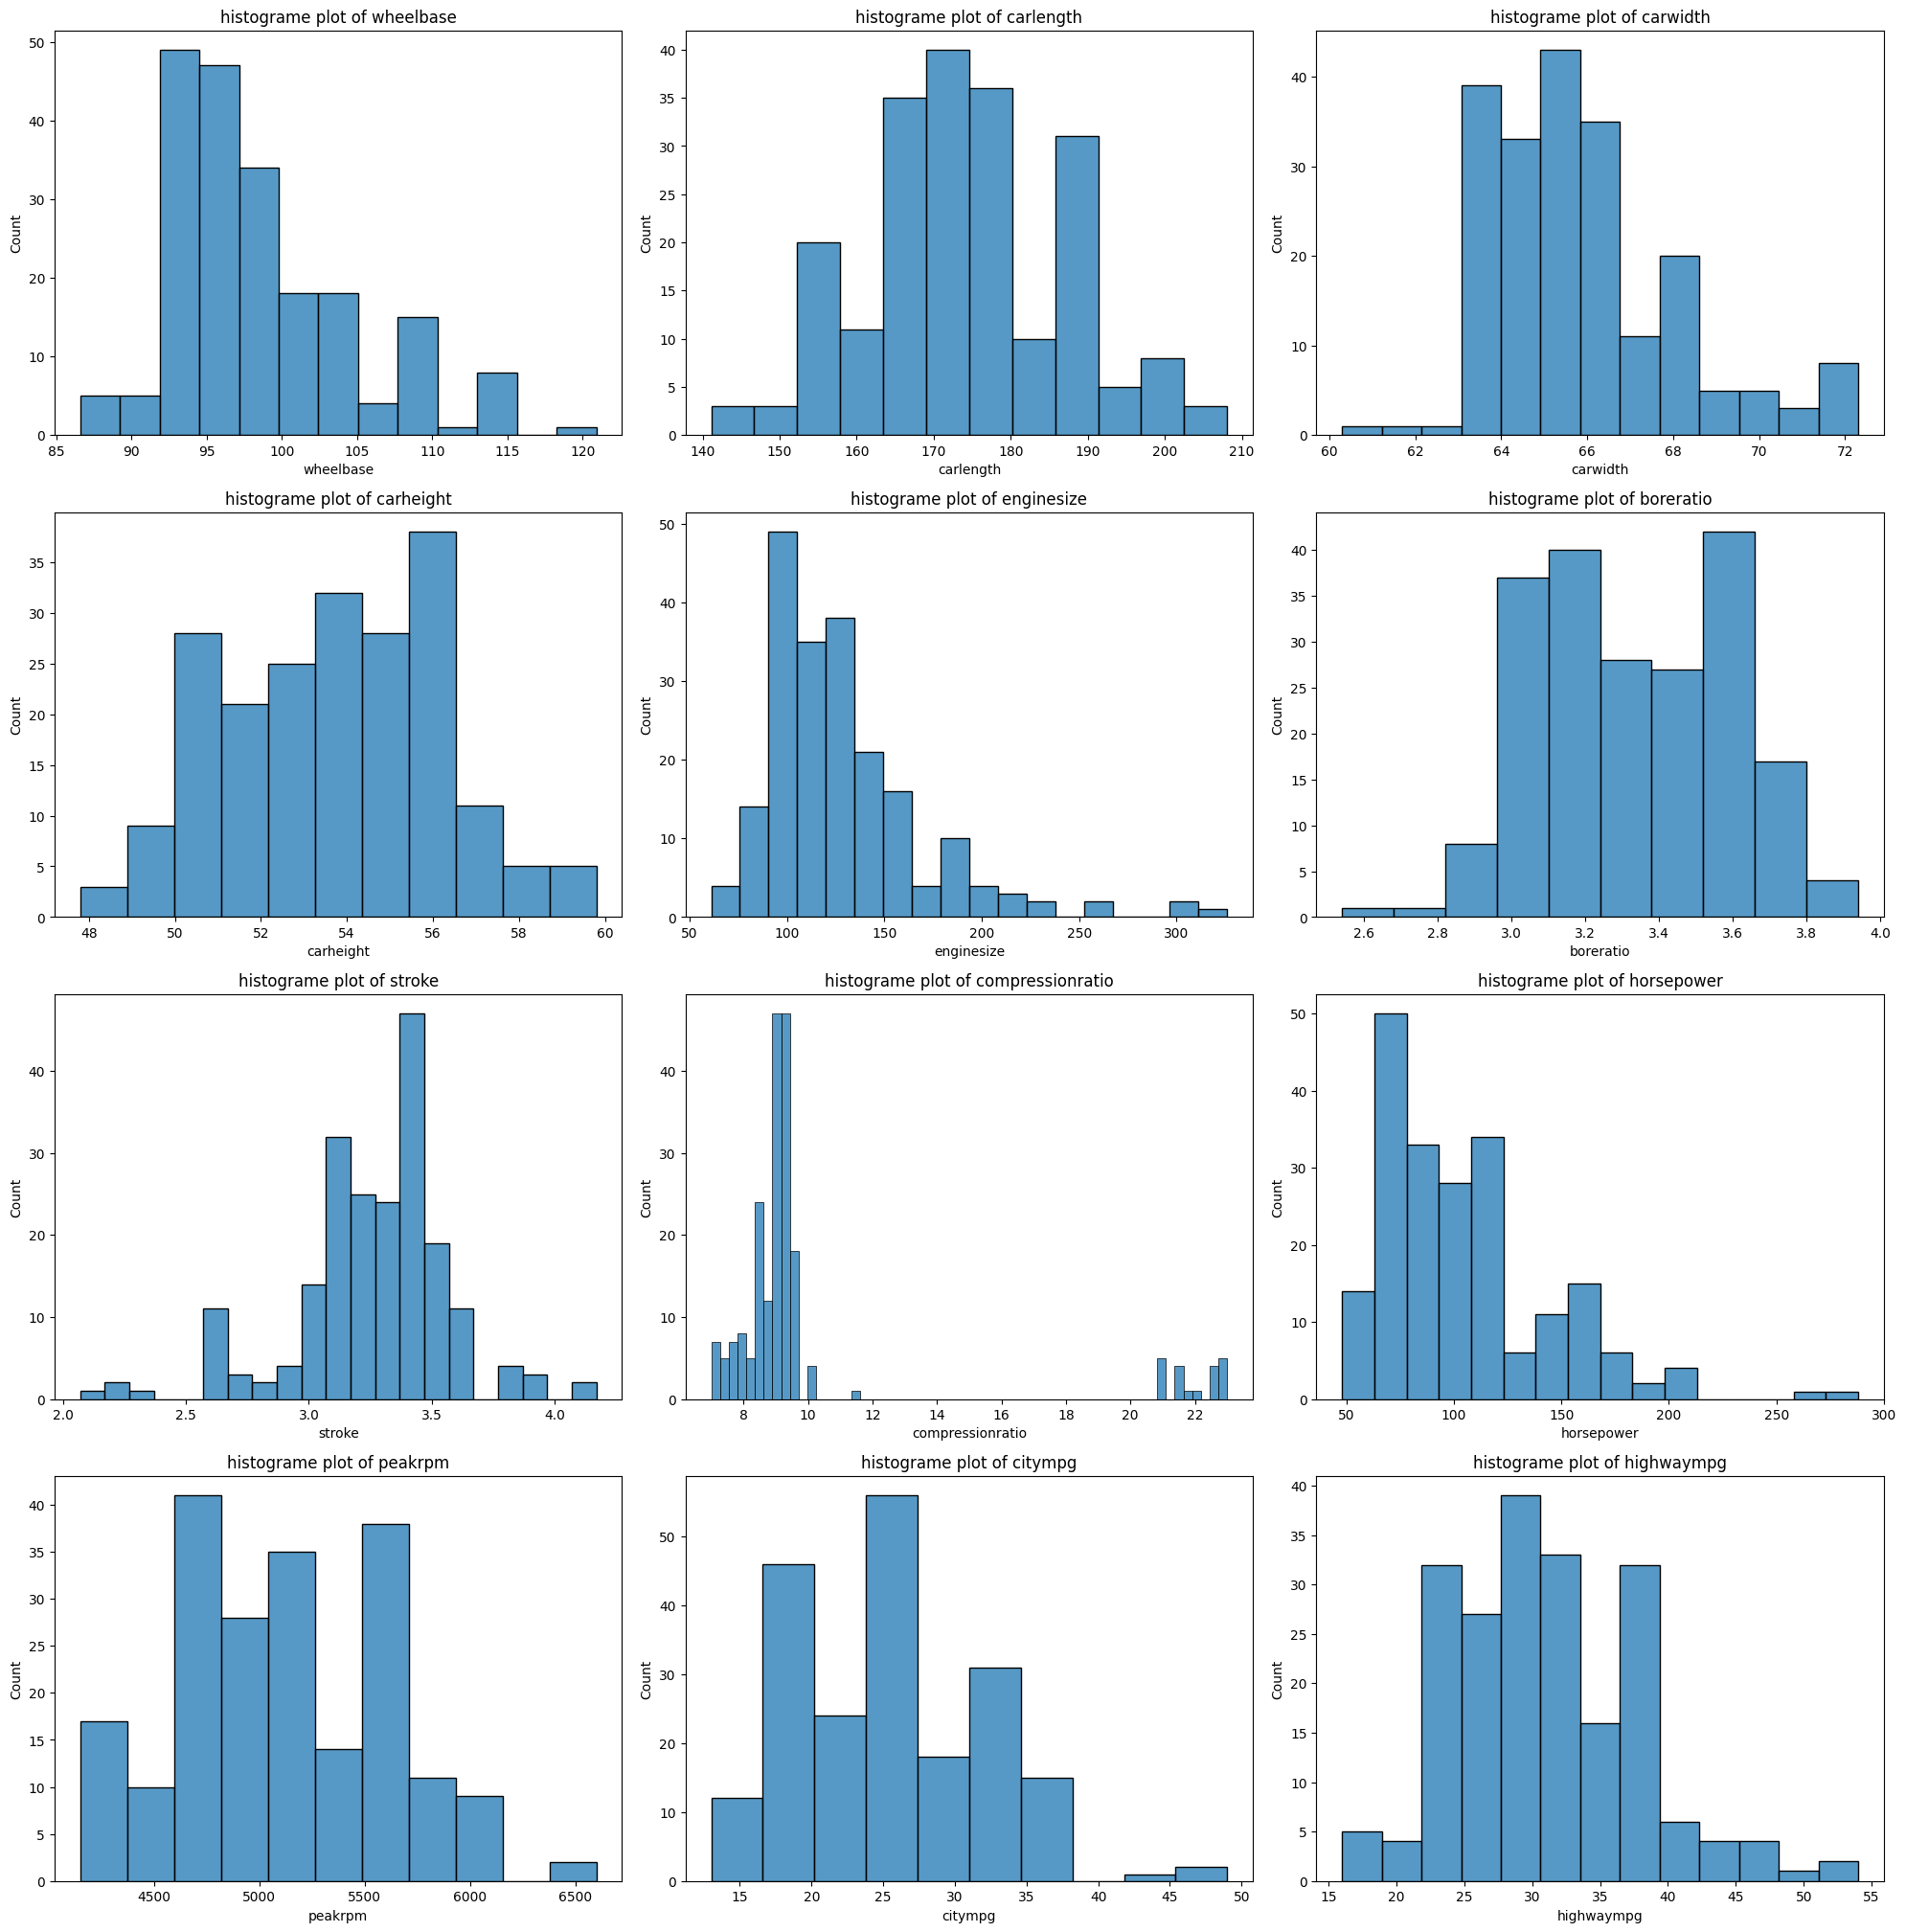

In [59]:
cleaner.continuous_plot(df,df.columns,7)

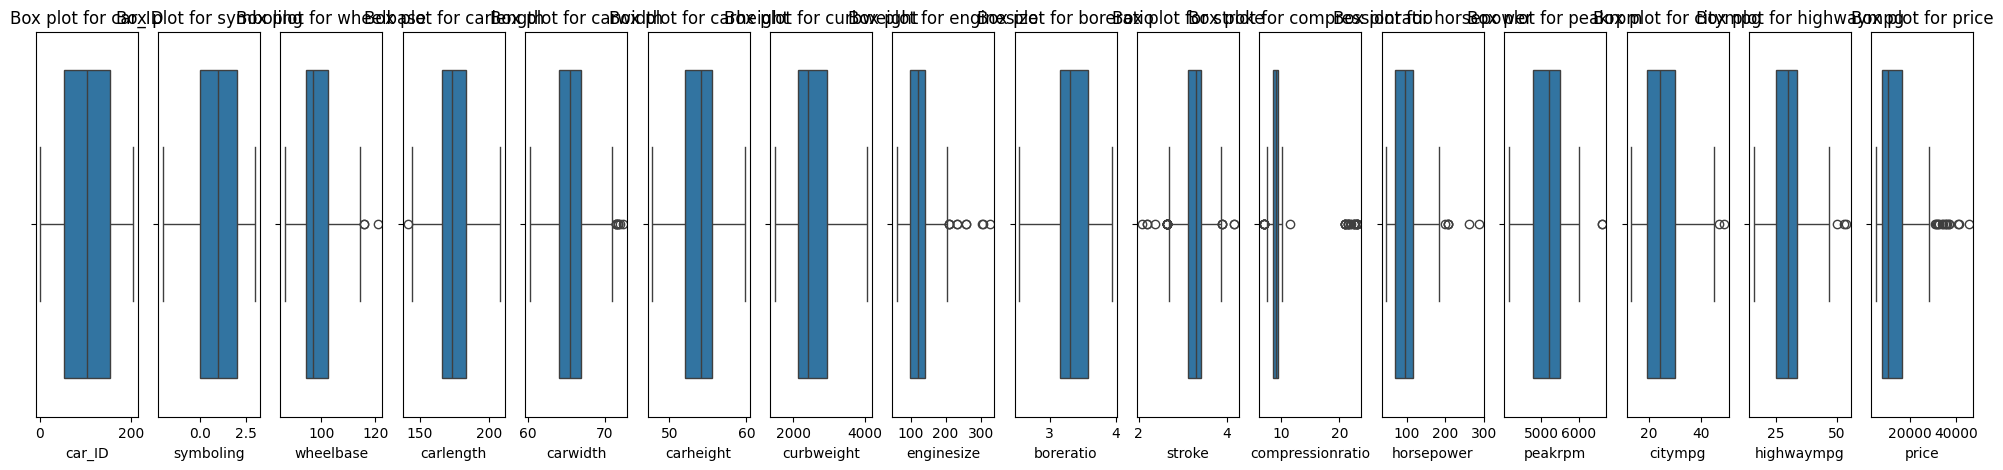

In [60]:
cleaner.boxplot_numeric_columns(df)

Not a good representation using this method.

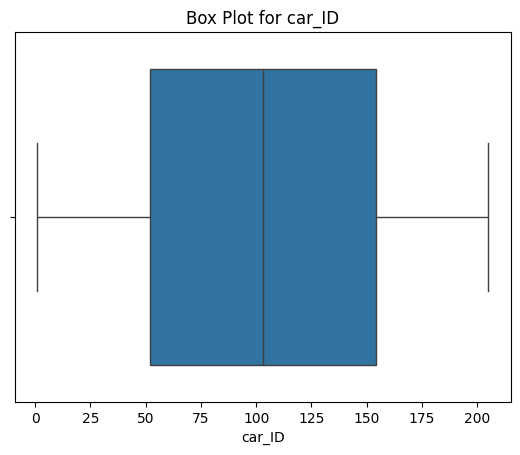

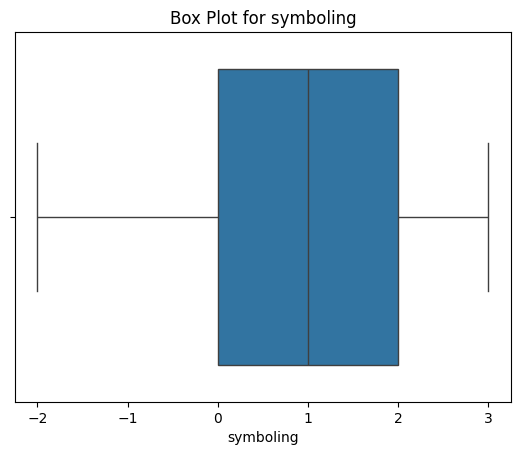

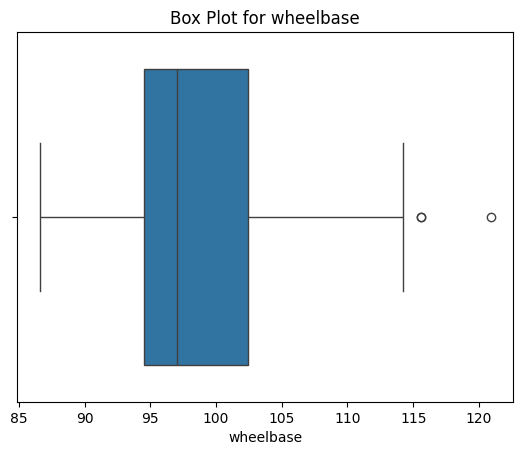

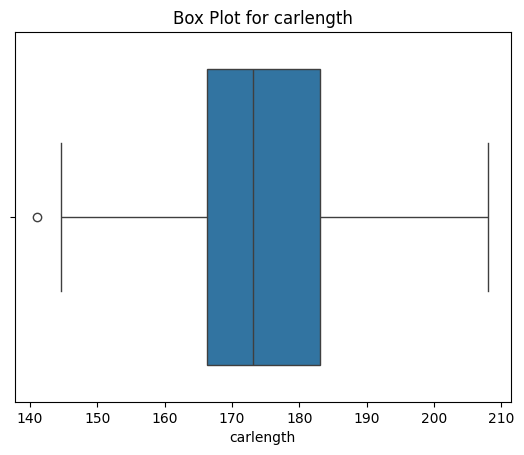

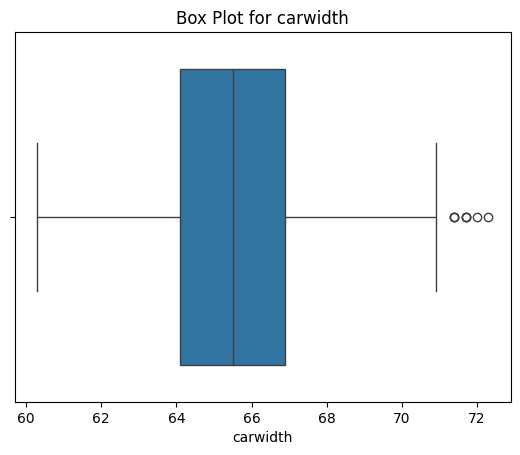

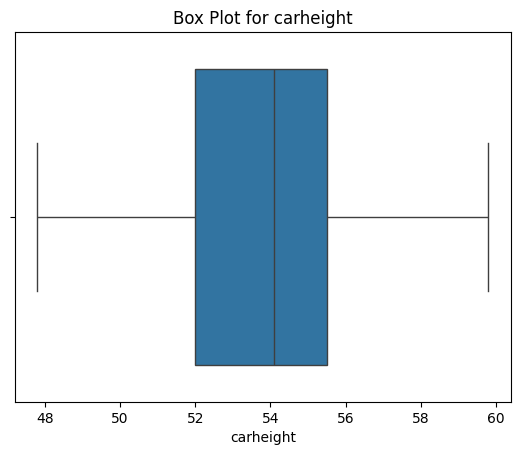

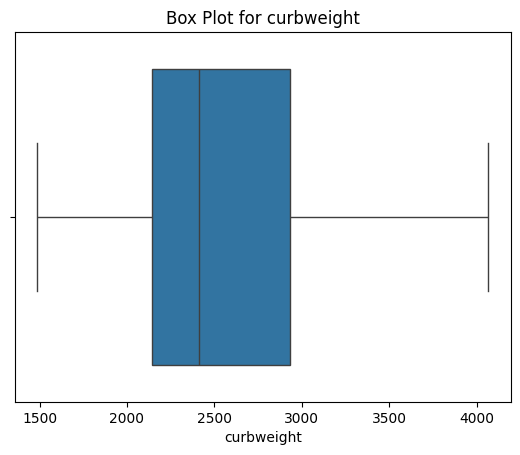

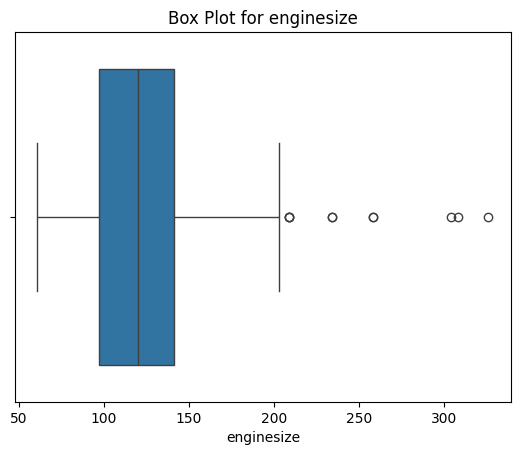

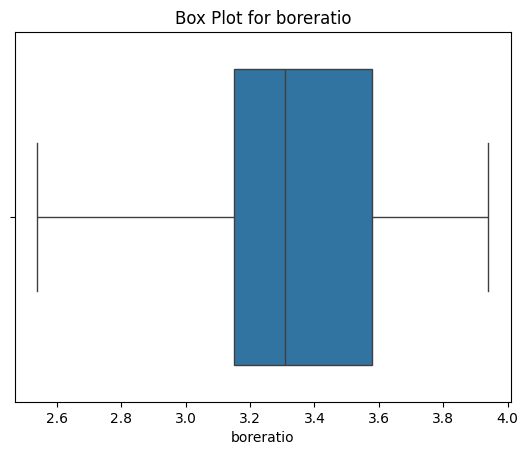

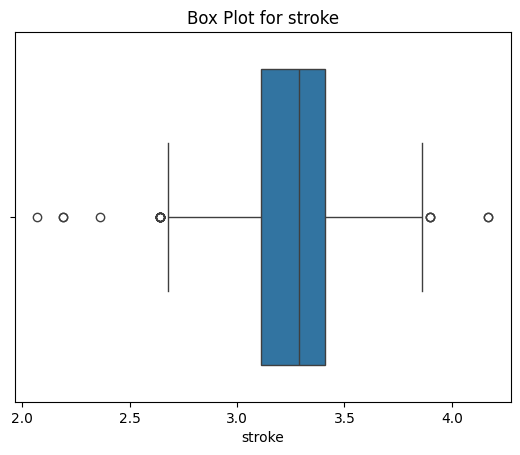

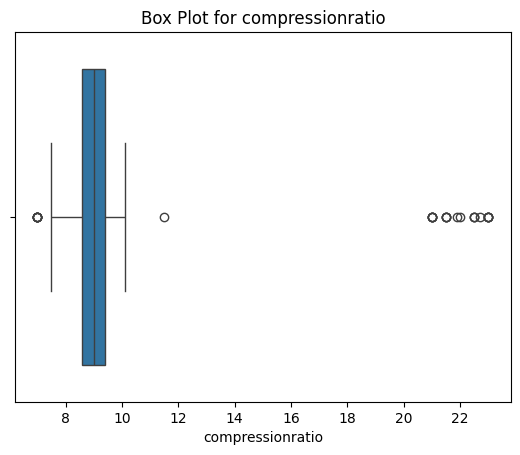

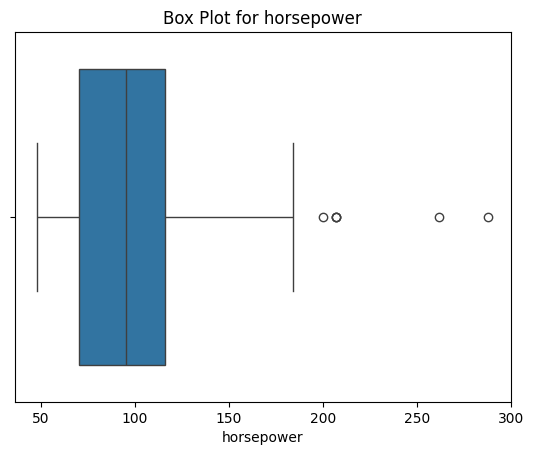

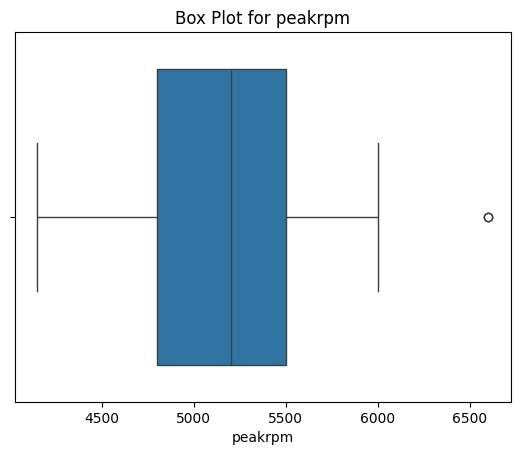

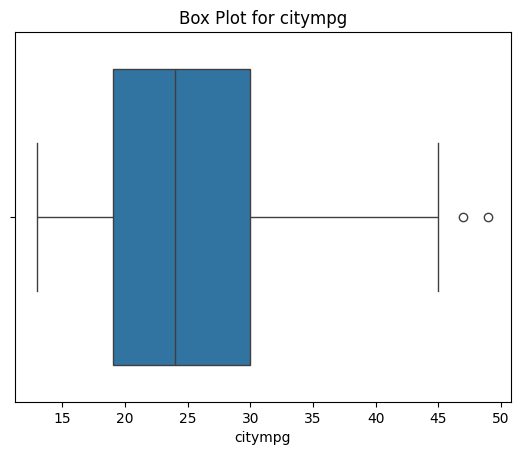

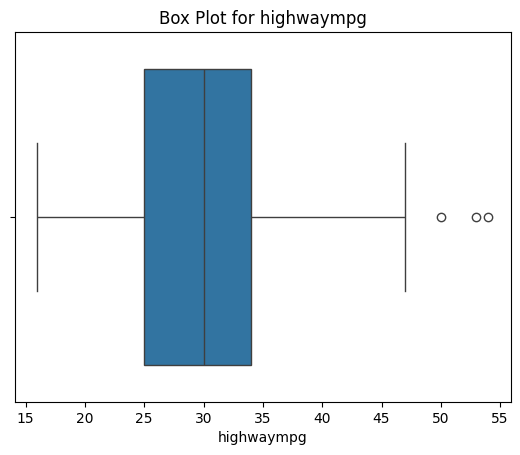

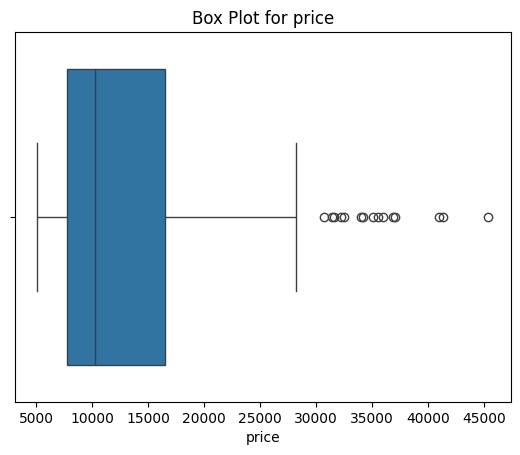

In [61]:
numeric_columns = df.select_dtypes(include=['number'])
for column in numeric_columns.columns:
  sns.boxplot(x=numeric_columns[column])
  plt.title(f"Box Plot for {column}")
  plt.show()

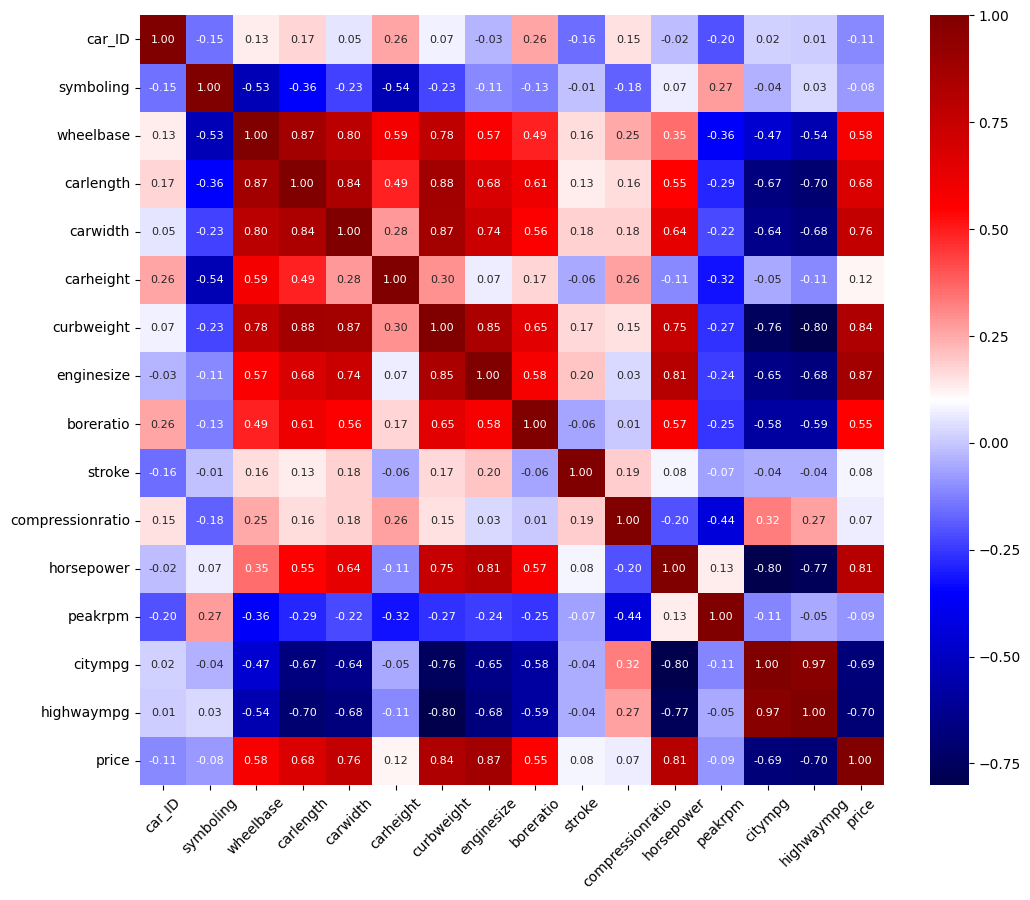

In [62]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="seismic", fmt=".2f", annot_kws={"size": 8})
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

1.   Strong positive correlation between price,carwidth,curbweight,enginesize and compressionratio.

2.   Strong positive correlation between horsepower and enginesize.

3.   Strong negative correlation between citympg,highwaympg and curbweight. citympg may be removed





In [63]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [64]:
df_copy=df
df_copy

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [65]:
df.drop('car_ID',axis=1,inplace=True)
df.duplicated().sum()

0

No duplicates found

In [66]:
df=cleaner.remove_outliers_iqr_countinuous(df,df.columns)

Was 205 rows became 125 rows so there were 80 outliers.

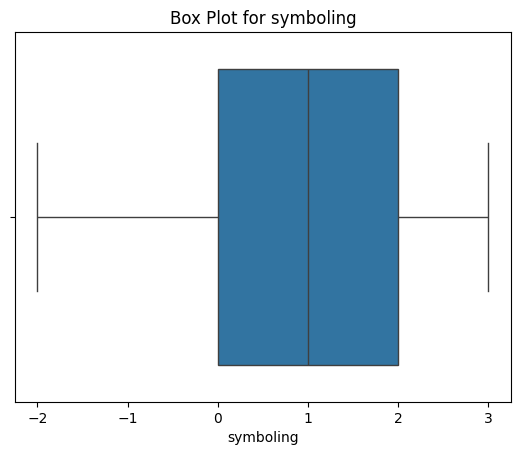

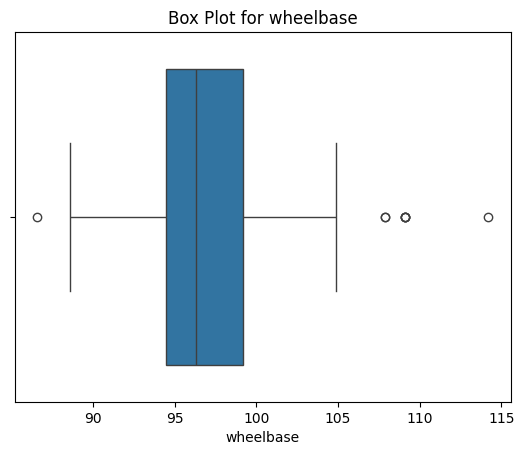

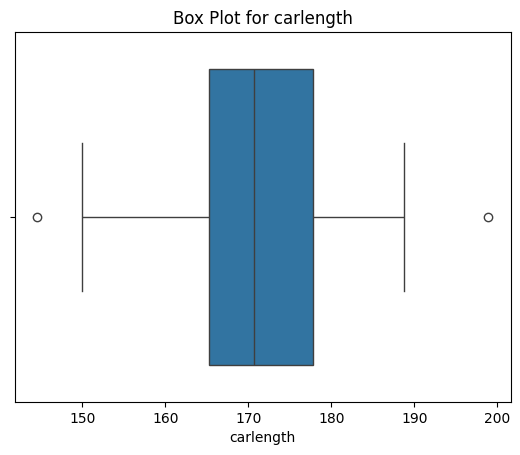

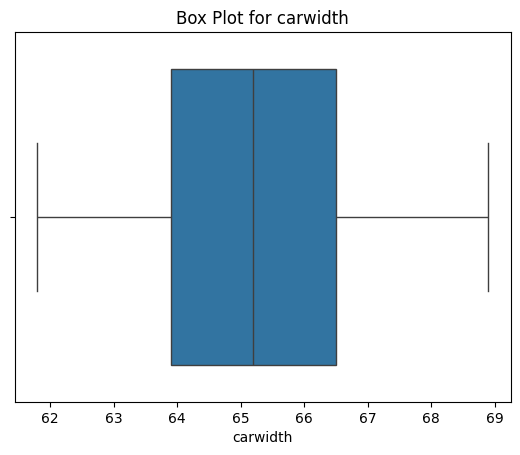

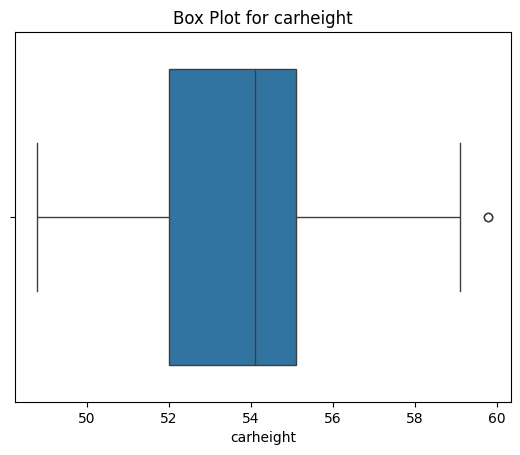

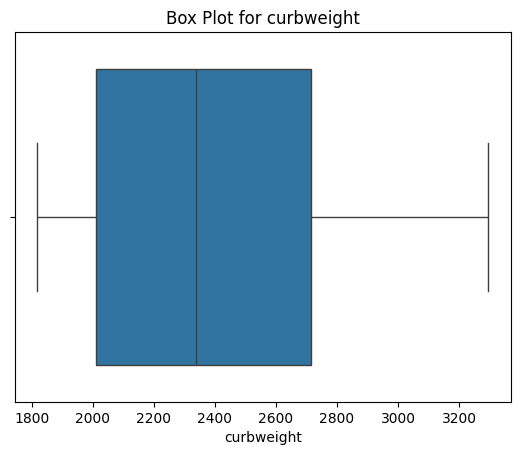

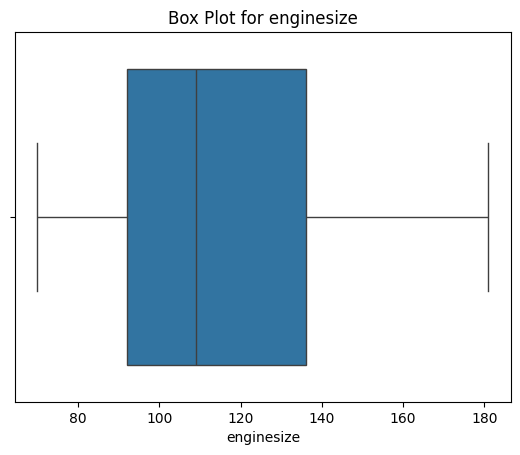

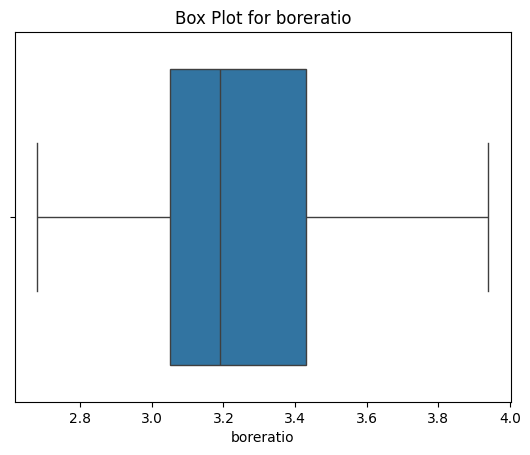

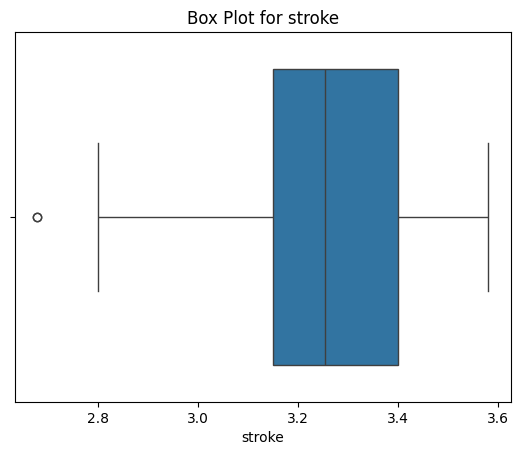

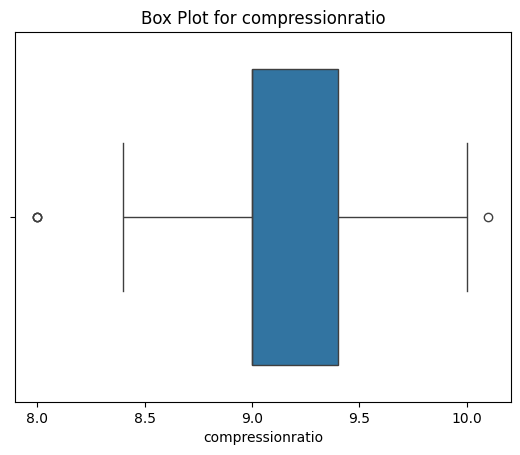

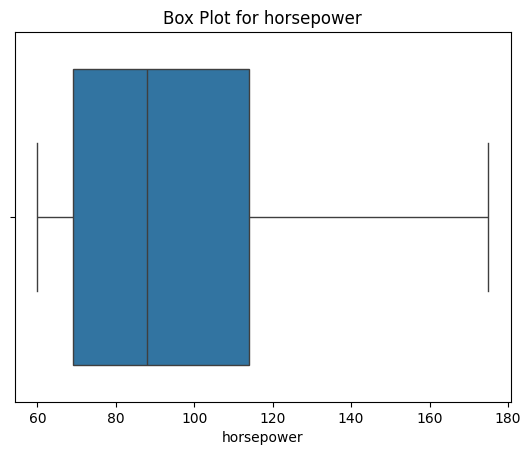

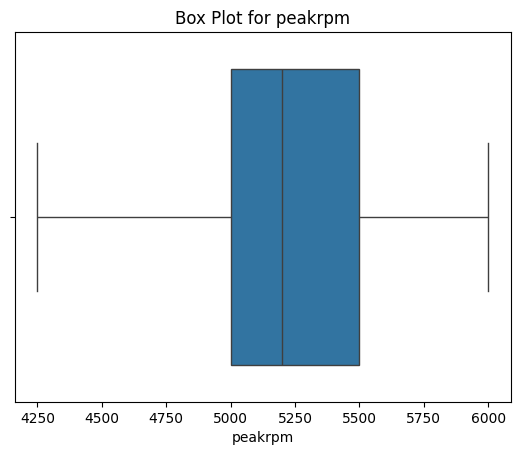

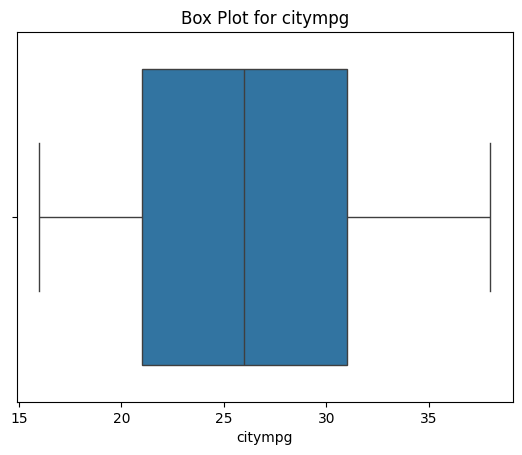

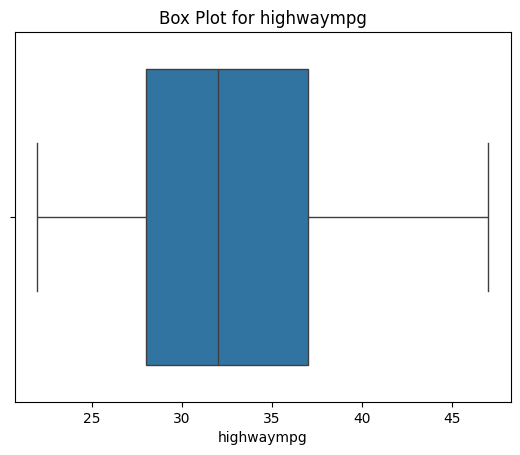

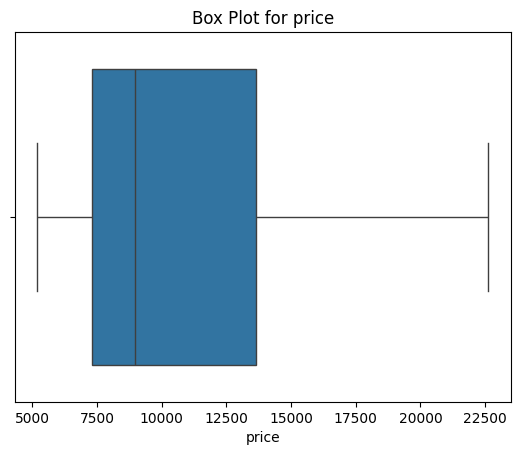

In [67]:
numeric_columns = df.select_dtypes(include=['number'])
for column in numeric_columns.columns:
  sns.boxplot(x=numeric_columns[column])
  plt.title(f"Box Plot for {column}")
  plt.show()

In [68]:
df=cleaner.remove_outliers_z_score_countinuous(df)

In [69]:
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
1,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
2,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
3,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.0
4,2,bmw 320i,gas,std,two,sedan,rwd,front,101.2,176.8,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,-1,volvo 245,gas,std,four,wagon,rwd,front,104.3,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515.0
119,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
120,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
121,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


Two more rows were removed

In [70]:
df_copy=df
df_copy

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
1,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
2,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
3,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.0
4,2,bmw 320i,gas,std,two,sedan,rwd,front,101.2,176.8,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,-1,volvo 245,gas,std,four,wagon,rwd,front,104.3,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515.0
119,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
120,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
121,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


In [74]:
df.drop('citympg',axis=1,inplace=True)

Dropped citympg CarName and CarID

In [75]:
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price
0,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,26,16500.0
1,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,four,109,mpfi,3.19,3.40,10.0,102,5500,30,13950.0
2,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,five,136,mpfi,3.19,3.40,8.0,115,5500,22,17450.0
3,2,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,...,five,136,mpfi,3.19,3.40,8.5,110,5500,25,15250.0
4,2,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,...,four,108,mpfi,3.50,2.80,8.8,101,5800,29,16430.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,-1,gas,std,four,wagon,rwd,front,104.3,188.8,67.2,...,four,141,mpfi,3.78,3.15,9.5,114,5400,28,16515.0
119,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,four,141,mpfi,3.78,3.15,9.5,114,5400,28,16845.0
120,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,four,141,mpfi,3.78,3.15,8.7,160,5300,25,19045.0
121,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,six,173,mpfi,3.58,2.87,8.8,134,5500,23,21485.0


In [76]:
df_copy=df

In [77]:
df.skew(numeric_only=True).sort_values(ascending=False)

wheelbase           1.181846
horsepower          0.985488
price               0.849025
enginesize          0.821258
carwidth            0.586892
boreratio           0.532964
curbweight          0.438145
carheight           0.312211
highwaympg          0.141343
peakrpm             0.124648
symboling           0.036174
carlength           0.009669
stroke             -0.150272
compressionratio   -0.452112
dtype: float64

In [78]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [84]:
cleaner.data_info(df)

,Col,dtype,n_uniques,n_nan,unique_val,duplicated
0,symboling,int64,6,0,"[1, 0, 2, 3, -1, -2]",1
1,fueltype,object,1,0,[gas],1
2,aspiration,object,2,0,"[std, turbo]",1
3,doornumber,object,2,0,"[four, two]",1
4,carbody,object,5,0,"[sedan, hatchback, wagon, hardtop, convertible]",1
5,drivewheel,object,3,0,"[fwd, rwd, 4wd]",1
6,enginelocation,object,1,0,[front],1
7,wheelbase,float64,31,0,"[94.5, 93.7, 95.7, 96.5, 98.4, 98.8, 99.1, 100...",1
8,carlength,float64,51,0,"[157.3, 188.8, 176.2, 166.3, 186.6, 177.8, 165...",1
9,carwidth,float64,30,0,"[63.8, 66.5, 63.6, 64.4, 65.2, 64.0, 65.6, 64....",1


 Categorical Features symboling 


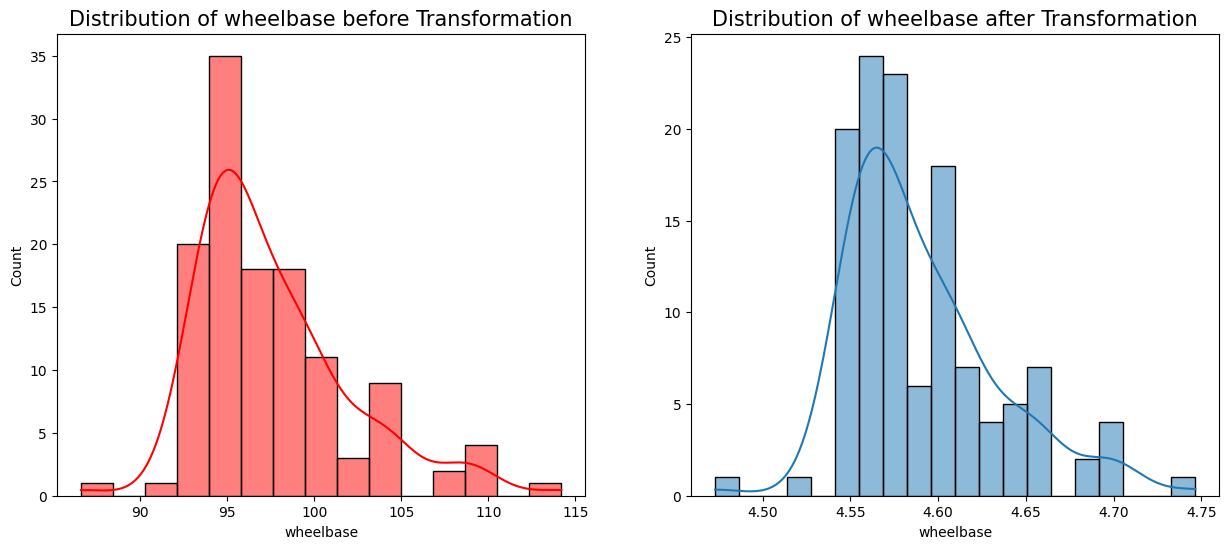

Skewness was 1.18185 before & is 1.03586 after Log transformation.
Normal distribution carlength


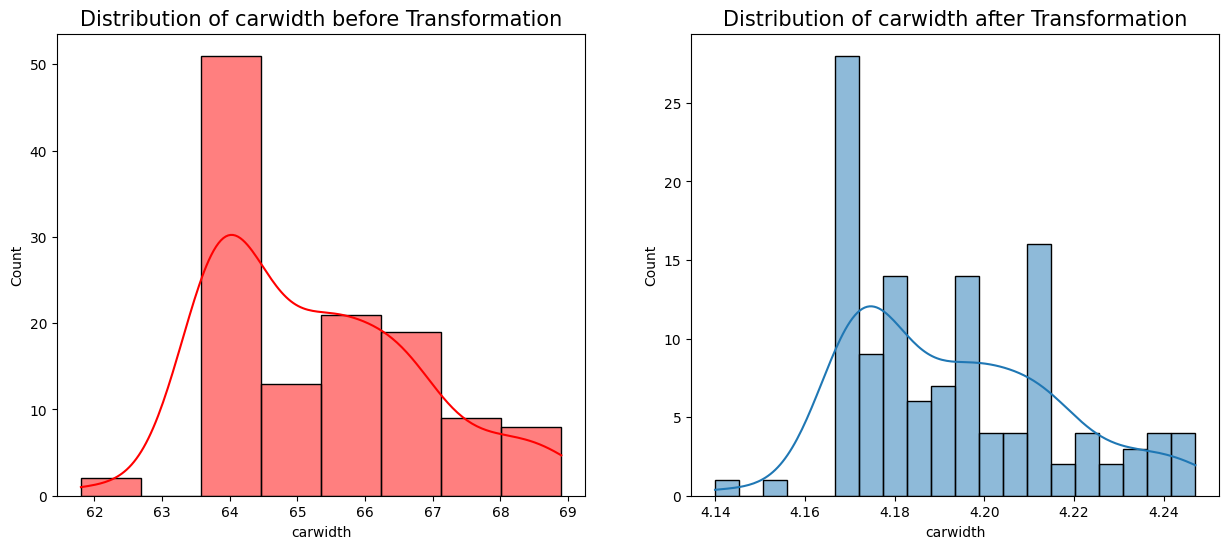

Skewness was 0.58689 before & is 0.54226 after Log transformation.
Normal distribution carheight
Normal distribution curbweight


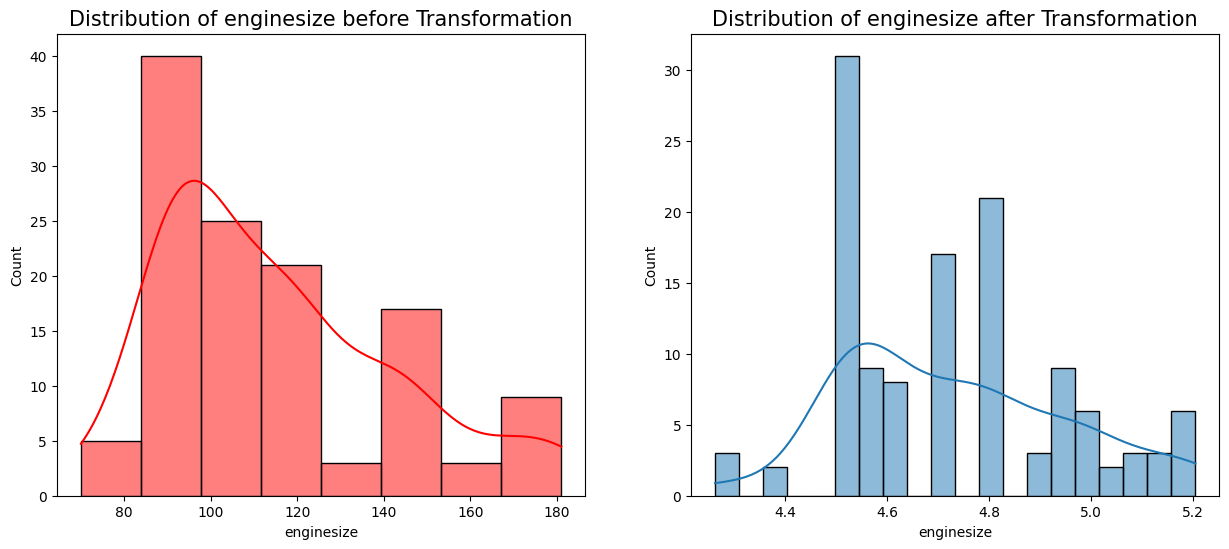

Skewness was 0.82126 before & is 0.40387 after Log transformation.


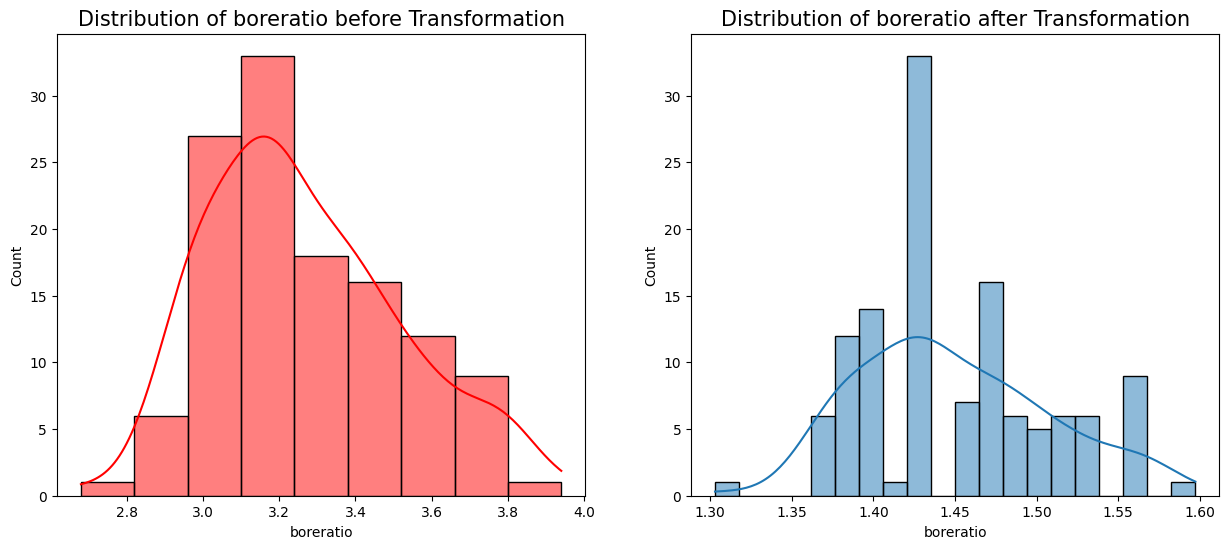

Skewness was 0.53296 before & is 0.40713 after Log transformation.
Normal distribution stroke
Normal distribution compressionratio


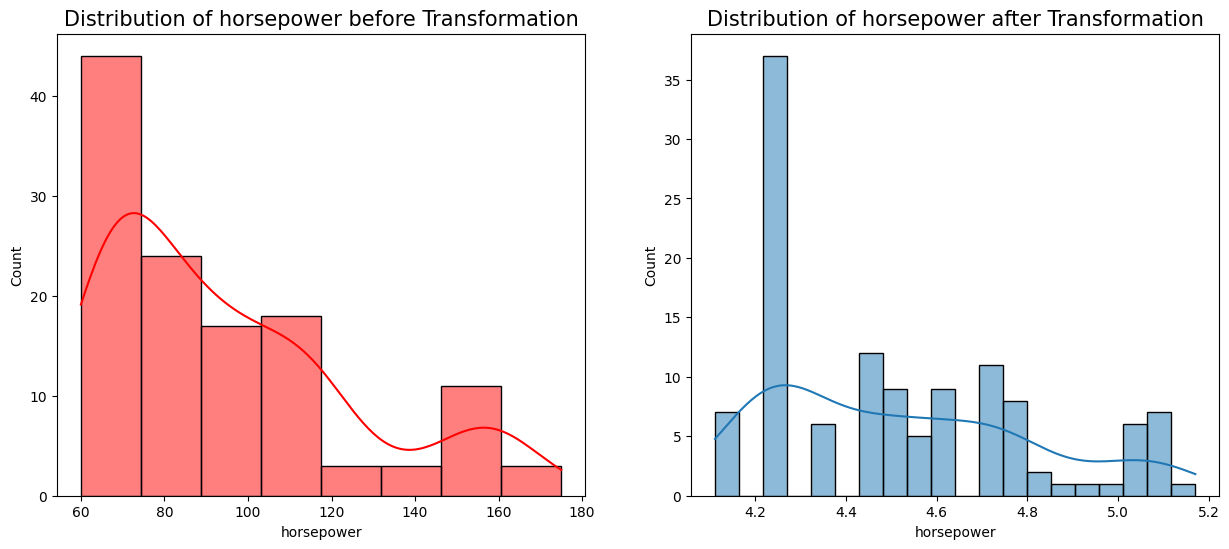

Skewness was 0.98549 before & is 0.57314 after Log transformation.
Normal distribution peakrpm
Normal distribution highwaympg


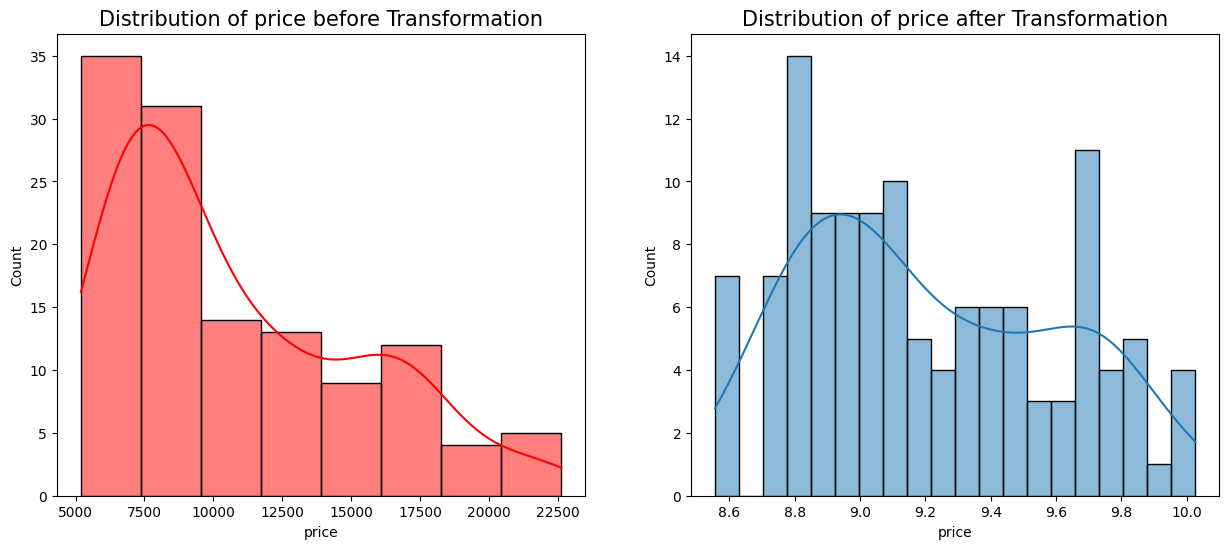

Skewness was 0.84903 before & is 0.34711 after Log transformation.


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price
0,1,gas,std,two,hatchback,rwd,front,4.559126,171.2,4.197202,...,six,5.030438,mpfi,1.302913,3.47,9.0,5.043425,5000,26,9.711176
1,2,gas,std,four,sedan,fwd,front,4.613138,176.6,4.207673,...,four,4.700480,mpfi,1.432701,3.40,10.0,4.634729,5500,30,9.543306
2,2,gas,std,four,sedan,4wd,front,4.609162,176.6,4.210645,...,five,4.919981,mpfi,1.432701,3.40,8.0,4.753590,5500,22,9.767152
3,2,gas,std,two,sedan,fwd,front,4.613138,177.3,4.209160,...,five,4.919981,mpfi,1.432701,3.40,8.5,4.709530,5500,25,9.632400
4,2,gas,std,two,sedan,rwd,front,4.626932,176.8,4.186620,...,four,4.691348,mpfi,1.504077,2.80,8.8,4.624973,5800,29,9.706925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,-1,gas,std,four,wagon,rwd,front,4.656813,188.8,4.222445,...,four,4.955827,mpfi,1.564441,3.15,9.5,4.744932,5400,28,9.712085
119,-1,gas,std,four,sedan,rwd,front,4.701389,188.8,4.247066,...,four,4.955827,mpfi,1.564441,3.15,9.5,4.744932,5400,28,9.731869
120,-1,gas,turbo,four,sedan,rwd,front,4.701389,188.8,4.245634,...,four,4.955827,mpfi,1.564441,3.15,8.7,5.081404,5300,25,9.854612
121,-1,gas,std,four,sedan,rwd,front,4.701389,188.8,4.247066,...,six,5.159055,mpfi,1.521699,2.87,8.8,4.905275,5500,23,9.975157


In [85]:
cleaner.Skewness_log_square(df,6)

In [86]:
df.skew(numeric_only=True).sort_values(ascending=False)

wheelbase           1.035862
horsepower          0.573145
carwidth            0.542260
curbweight          0.438145
boreratio           0.407128
enginesize          0.403865
price               0.347112
carheight           0.312211
highwaympg          0.141343
peakrpm             0.124648
symboling           0.036174
carlength           0.009669
stroke             -0.150272
compressionratio   -0.452112
dtype: float64

In [87]:
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price
0,1,gas,std,two,hatchback,rwd,front,4.559126,171.2,4.197202,...,six,5.030438,mpfi,1.302913,3.47,9.0,5.043425,5000,26,9.711176
1,2,gas,std,four,sedan,fwd,front,4.613138,176.6,4.207673,...,four,4.700480,mpfi,1.432701,3.40,10.0,4.634729,5500,30,9.543306
2,2,gas,std,four,sedan,4wd,front,4.609162,176.6,4.210645,...,five,4.919981,mpfi,1.432701,3.40,8.0,4.753590,5500,22,9.767152
3,2,gas,std,two,sedan,fwd,front,4.613138,177.3,4.209160,...,five,4.919981,mpfi,1.432701,3.40,8.5,4.709530,5500,25,9.632400
4,2,gas,std,two,sedan,rwd,front,4.626932,176.8,4.186620,...,four,4.691348,mpfi,1.504077,2.80,8.8,4.624973,5800,29,9.706925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,-1,gas,std,four,wagon,rwd,front,4.656813,188.8,4.222445,...,four,4.955827,mpfi,1.564441,3.15,9.5,4.744932,5400,28,9.712085
119,-1,gas,std,four,sedan,rwd,front,4.701389,188.8,4.247066,...,four,4.955827,mpfi,1.564441,3.15,9.5,4.744932,5400,28,9.731869
120,-1,gas,turbo,four,sedan,rwd,front,4.701389,188.8,4.245634,...,four,4.955827,mpfi,1.564441,3.15,8.7,5.081404,5300,25,9.854612
121,-1,gas,std,four,sedan,rwd,front,4.701389,188.8,4.247066,...,six,5.159055,mpfi,1.521699,2.87,8.8,4.905275,5500,23,9.975157


In [99]:
Cat_Features=df.select_dtypes('object')
Cat_Features['symboling']=df['symboling']
Cat_Features_Names=Cat_Features.columns
Cat_Features_Names

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'symboling'],
      dtype='object')

In [104]:
from sklearn.preprocessing import OneHotEncoder

In [105]:
info_cat = df[Cat_Features_Names]
info_cat.head(5)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,symboling
0,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,1
1,gas,std,four,sedan,fwd,front,ohc,four,mpfi,2
2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,2
3,gas,std,two,sedan,fwd,front,ohc,five,mpfi,2
4,gas,std,two,sedan,rwd,front,ohc,four,mpfi,2


In [106]:
ohe=OneHotEncoder()
info_cat_1hot=ohe.fit_transform(info_cat)

In [107]:
info_cat_1hot_df = pd.DataFrame(info_cat_1hot.toarray(), columns=ohe.get_feature_names_out())
info_cat_1hot_df

,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,...,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_mpfi,fuelsystem_spfi,symboling_-2,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3
0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
119,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
120,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
121,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [108]:
df_2 = df.merge(info_cat_1hot_df,left_index=True, right_index=True)

In [109]:
df_2=df_2.drop(Cat_Features_Names,axis=1)

In [111]:
pd.options.display.max_columns = None
df_2

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_mpfi,fuelsystem_spfi,symboling_-2,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3
0,4.559126,171.2,4.197202,52.4,2823,5.030438,1.302913,3.47,9.0,5.043425,5000,26,9.711176,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,4.613138,176.6,4.207673,54.3,2337,4.700480,1.432701,3.40,10.0,4.634729,5500,30,9.543306,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4.609162,176.6,4.210645,54.3,2824,4.919981,1.432701,3.40,8.0,4.753590,5500,22,9.767152,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.613138,177.3,4.209160,53.1,2507,4.919981,1.432701,3.40,8.5,4.709530,5500,25,9.632400,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4.626932,176.8,4.186620,54.3,2395,4.691348,1.504077,2.80,8.8,4.624973,5800,29,9.706925,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,4.656813,188.8,4.222445,57.5,3042,4.955827,1.564441,3.15,9.5,4.744932,5400,28,9.712085,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
119,4.701389,188.8,4.247066,55.5,2952,4.955827,1.564441,3.15,9.5,4.744932,5400,28,9.731869,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
120,4.701389,188.8,4.245634,55.5,3049,4.955827,1.564441,3.15,8.7,5.081404,5300,25,9.854612,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
121,4.701389,188.8,4.247066,55.5,3012,5.159055,1.521699,2.87,8.8,4.905275,5500,23,9.975157,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [116]:
info_cat_1hot_df.columns

Index(['fueltype_gas', 'aspiration_std', 'aspiration_turbo', 'doornumber_four',
       'doornumber_two', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_front',
       'enginetype_dohc', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_two', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_mpfi',
       'fuelsystem_spfi', 'symboling_-2', 'symboling_-1', 'symboling_0',
       'symboling_1', 'symboling_2', 'symboling_3'],
      dtype='object')

In [112]:
df_2_cols = list(df_2.columns)
for i in info_cat_1hot_df.columns:
  df_2_cols.remove(i)
df_2_cols

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'highwaympg',
 'price']

In [113]:
from sklearn.preprocessing import StandardScaler

In [114]:
df_2

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_mpfi,fuelsystem_spfi,symboling_-2,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3
0,4.559126,171.2,4.197202,52.4,2823,5.030438,1.302913,3.47,9.0,5.043425,5000,26,9.711176,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,4.613138,176.6,4.207673,54.3,2337,4.700480,1.432701,3.40,10.0,4.634729,5500,30,9.543306,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4.609162,176.6,4.210645,54.3,2824,4.919981,1.432701,3.40,8.0,4.753590,5500,22,9.767152,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.613138,177.3,4.209160,53.1,2507,4.919981,1.432701,3.40,8.5,4.709530,5500,25,9.632400,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4.626932,176.8,4.186620,54.3,2395,4.691348,1.504077,2.80,8.8,4.624973,5800,29,9.706925,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,4.656813,188.8,4.222445,57.5,3042,4.955827,1.564441,3.15,9.5,4.744932,5400,28,9.712085,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
119,4.701389,188.8,4.247066,55.5,2952,4.955827,1.564441,3.15,9.5,4.744932,5400,28,9.731869,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
120,4.701389,188.8,4.245634,55.5,3049,4.955827,1.564441,3.15,8.7,5.081404,5300,25,9.854612,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
121,4.701389,188.8,4.247066,55.5,3012,5.159055,1.521699,2.87,8.8,4.905275,5500,23,9.975157,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [115]:
scaler = StandardScaler()
num_scaled=scaler.fit_transform(df_2[df_2_cols])
scaled_df=pd.DataFrame(num_scaled,columns=df_2_cols)
scaled_df

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price
0,-0.723130,-0.019669,0.157529,-0.560923,1.031771,1.346447,-2.505705,1.232769,-0.213711,1.824698,-0.671660,-1.032079,1.295718
1,0.516446,0.486687,0.613116,0.246765,-0.151054,-0.137624,-0.277383,0.820729,2.333427,0.395887,0.665139,-0.333616,0.864887
2,0.425193,0.486687,0.742412,0.246765,1.034205,0.849638,-0.277383,0.820729,-2.760850,0.811428,0.665139,-1.730543,1.439378
3,0.516446,0.552326,0.677812,-0.263354,0.262692,0.849638,-0.277383,0.820729,-1.487280,0.657394,0.665139,-1.206695,1.093543
4,0.833002,0.505441,-0.302879,0.246765,-0.009893,-0.178699,0.948079,-2.711038,-0.723139,0.361779,1.467218,-0.508232,1.284807
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,1.518787,1.630677,1.255789,1.607080,1.564772,1.010865,1.984450,-0.650841,1.059858,0.781160,0.397779,-0.682847,1.298050
119,2.541795,1.630677,2.327006,0.756883,1.345731,1.010865,1.984450,-0.650841,1.059858,0.781160,0.397779,-0.682847,1.348824
120,2.541795,1.630677,2.264718,0.756883,1.581809,1.010865,1.984450,-0.650841,-0.977853,1.957475,0.130419,-1.206695,1.663841
121,2.541795,1.630677,2.327006,0.756883,1.491759,1.924938,1.250623,-2.298999,-0.723139,1.341721,0.665139,-1.555927,1.973213
